In [399]:
import pandas as pd
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['figure.figsize'] = [12, 8]
import os
import glob

def get_files(fn):
    home = os.path.expanduser('~')
    path = f'{home}/Downloads/project_mining_2022/dataset/'
    # current_path = os.getcwd()
    # path = f'{current_path}/dateset/'
    files = glob.glob(path + fn + '/*.csv')
    return files


def to_date(char):
    return char[:4] + '-' + char[4:6] + '-' + char[6:8]

# for each file create a pandas df
# concatenate them all together
# change index to datetime
def parse_file(files, filenames):
    list_of_pandas = []
    for i, f in enumerate(files):
        # if file empty
        if os.stat(f).st_size != 0:
            # create df
            temp = pd.read_csv(f, header=0, nrows=288, skip_blank_lines=False)
            # create date column
            temp['Date'] = [to_date(filenames[i]) for _ in range(288)]
            # append df 
            list_of_pandas += [temp]
    # cast all together
    df = pd.concat(list_of_pandas, ignore_index=True)
    df.index = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
    df.drop(columns=['Date', 'Time'], inplace=True)
    return df

In [400]:
# list files
demand_files = get_files('demand')
source_files = get_files('sources')

# list filenames to use on timestamps
filenames = [file[-12: -4] for file in demand_files]

# get data from files
demands = parse_file(demand_files, filenames)
sources = parse_file(source_files, filenames)

# move values and drop temp cols
sources['Natural gas'].fillna(sources['Natural Gas'], inplace=True)
sources['Large hydro'].fillna(sources['Large Hydro'], inplace=True)
sources.drop(columns=['Natural Gas', 'Large Hydro'], inplace=True)

In [401]:
"""
# plot all data. Measurements every 5 mins
demands['Current demand'].plot()
pyplot.show()

# plot every hour
demands.loc[:, 'Current demand'][0::12].plot()
pyplot.show()

# plot per day
demands.loc[:, 'Current demand'][0::288].plot()
pyplot.show()

# plot all data. Measurements every 5 mins
sources.plot()
pyplot.show()

# plot every hour
sources[0::12].plot()
pyplot.show()

# plot per day
sources[0::288].plot()
pyplot.show()
"""

"\n# plot all data. Measurements every 5 mins\ndemands['Current demand'].plot()\npyplot.show()\n\n# plot every hour\ndemands.loc[:, 'Current demand'][0::12].plot()\npyplot.show()\n\n# plot per day\ndemands.loc[:, 'Current demand'][0::288].plot()\npyplot.show()\n\n# plot all data. Measurements every 5 mins\nsources.plot()\npyplot.show()\n\n# plot every hour\nsources[0::12].plot()\npyplot.show()\n\n# plot per day\nsources[0::288].plot()\npyplot.show()\n"

In [402]:
demands.shape

(315648, 3)

In [403]:
# null values in demands are probably due to power cut
# so, linear interpolation will be good estimate
demands.interpolate(method='linear', axis=0, inplace=True)

In [404]:
demands.isna().sum()
demands.loc[demands['Current demand'] <= 0]

,Day ahead forecast,Hour ahead forecast,Current demand
2019-10-02 14:45:00,24209.0,24727.0,-2651.0
2019-10-02 14:50:00,24209.0,24993.0,-2646.0


In [405]:
sources.isna().sum()

Solar           54
Wind            54
Geothermal     342
Biomass         54
Biogas          54
Small hydro     54
Coal            54
Nuclear         54
Natural gas    342
Large hydro     54
Batteries       54
Imports        342
Other           54
dtype: int64

In [406]:
sources.interpolate(method='linear', axis=0, inplace=True)

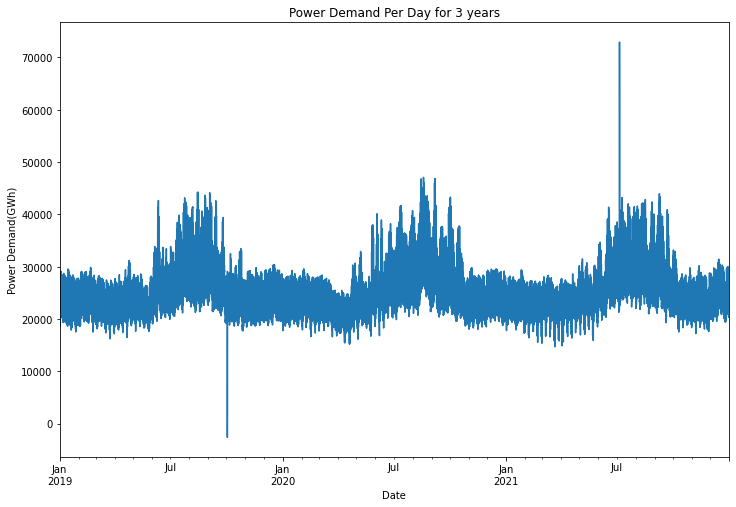

In [407]:
demands['Current demand'].plot(xlabel='Date', ylabel='Power Demand(GWh)', title = 'Power Demand Per Day for 3 years')
pyplot.show()

In [408]:
# Rolling mean and std for demand with a window of an hour
demands_rolmean = demands['Current demand'].rolling(window=289).mean()
demands_rolstd = demands['Current demand'].rolling(window=289).std()

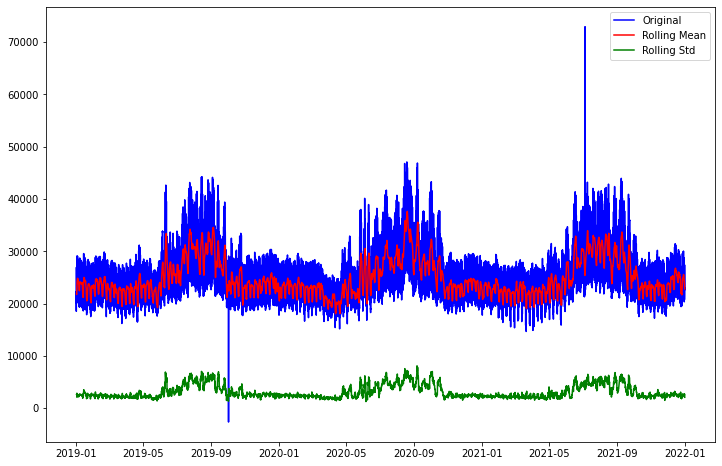

In [409]:
pyplot.plot(demands['Current demand'], color='blue', label='Original')
pyplot.plot(demands_rolmean, color='red', label='Rolling Mean')
pyplot.plot(demands_rolstd, color='green', label='Rolling Std')
# pyplot.xlabel='Date', ylabel='Power Demand(GWh)', title = 'Power Demand Per Day for 3 years'
pyplot.legend(loc='best')
# pyplot.title('Rolling Mean & Standard Deviation')
pyplot.show(block=False)

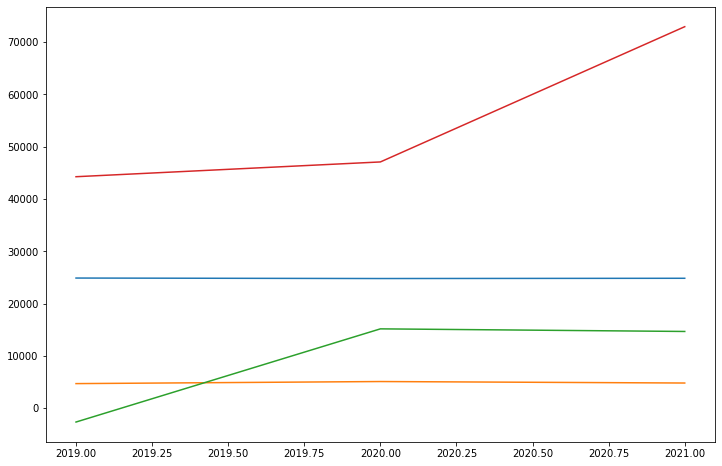

In [441]:
# calc mean, std per year
means = demands.groupby(by=demands.index.year).mean()['Current demand']
stds = demands.groupby(by=demands.index.year).std()['Current demand']
mins = demands.groupby(by=demands.index.year).min()['Current demand']
maxs = demands.groupby(by=demands.index.year).max()['Current demand']

basic_stats = pd.concat([means, stds, mins, maxs], axis=1, keys=['Mean/Year', 'Std/Year', 'Min/Year', 'Max/Year'])
pyplot.plot(basic_stats)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

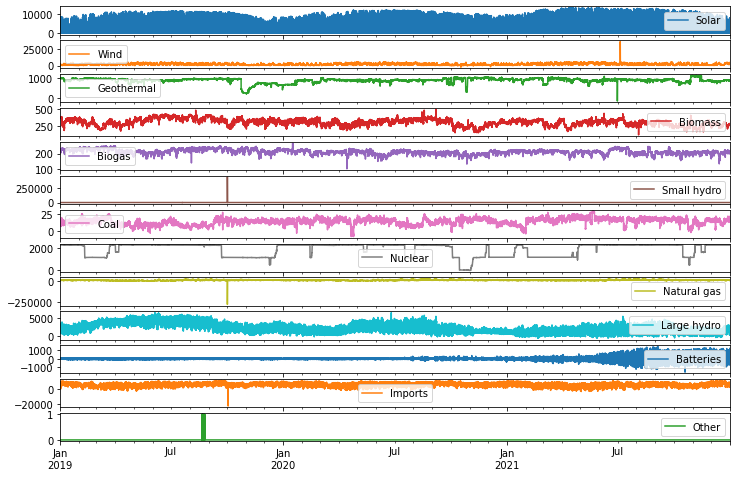

In [362]:
# dftest = statsmodel.tsa.stattools.adfuller(demansd)
# sources[['Solar', 'Batteries']][0::12].plot(subplots=True)
sources.plot(subplots=True)